##**Text to image generation using "Dall-e"**

####**Import Statement**

In [ ]:
import os
import requests
from bs4 import BeautifulSoup
from typing import List
from dotenv import load_dotenv
from openai import OpenAI

In [ ]:
import gradio as gr

In [ ]:
load_dotenv()
openai_api_key = os.getenv('OPENAI_API_KEY')

In [ ]:
openai = OpenAI()

In [ ]:
import base64
from io import BytesIO
from PIL import Image

In [ ]:
directory="hrdataset/employees"
def read_markdown_files(directory):
    """Read and load content from all Markdown files in a directory."""
    documents = []
    for filename in os.listdir(directory):
        if filename.endswith(".md"):
            filepath = os.path.join(directory, filename)
            with open(filepath, 'r', encoding='utf-8') as f:
                documents.append({"filename": filename, "content": f.read()})
    return documents

In [ ]:
docs=read_markdown_files(directory)

####**Function for image generation**

In [ ]:
def artist(name, hobby):
    image_response = openai.images.generate(
            model="dall-e-3",
            prompt=f"An image representing a boy what he likes the most - {hobby} with his name {name} on the t-shirt wearing on the image",
            size="1024x1024",
            n=1,
            response_format="b64_json",
        )
    image_base64 = image_response.data[0].b64_json
    image_data = base64.b64decode(image_base64)
    return Image.open(BytesIO(image_data))

####**Function Execution**

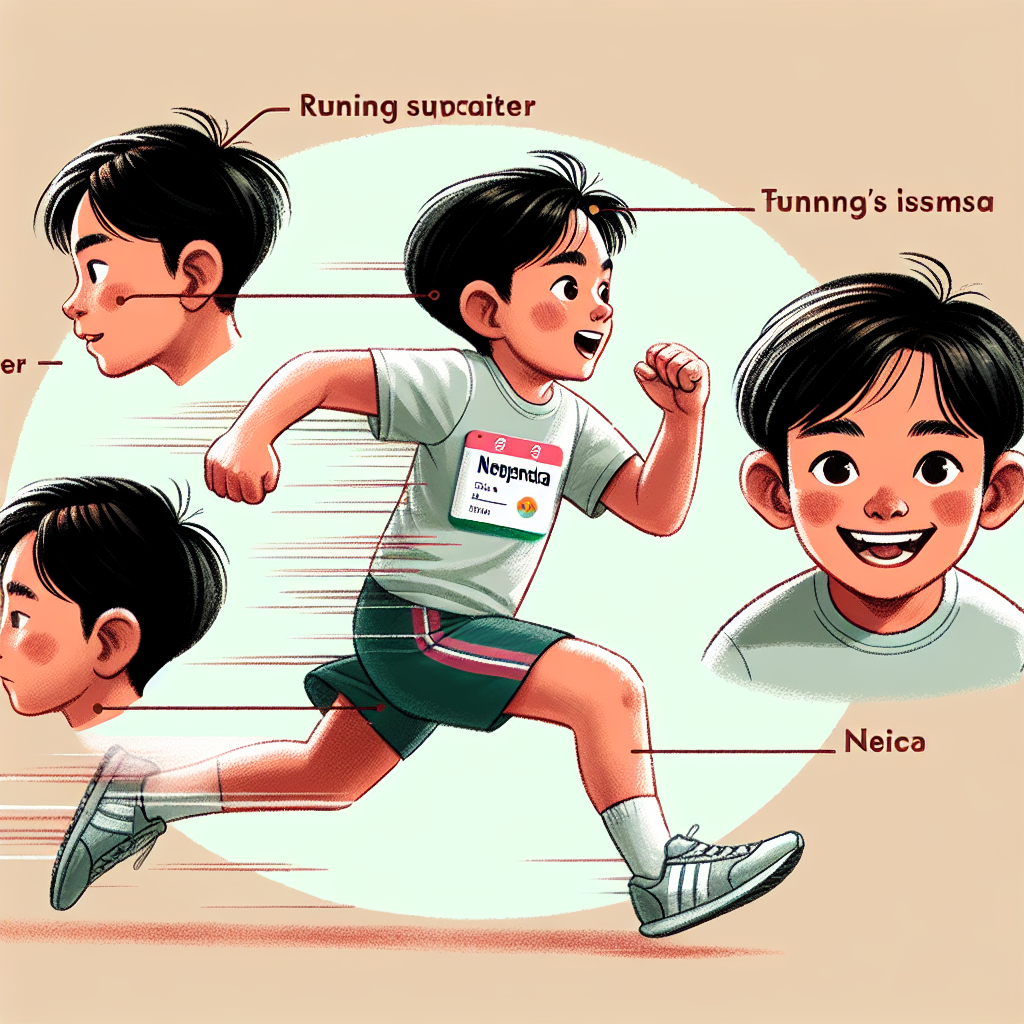

In [ ]:
image = artist("Neependra", "running")
display(image)